# **Used Cars Price Prediction** 

### Part 2_ Machine Learning

In [197]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

In [198]:
data = pd.read_csv("used_cars_copy.csv")

In [199]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Kilometers_Driven_Log', 'Price', 'Price_Log'],
      dtype='object')

In [200]:
unique_name_groups = data['Location'].nunique()
print("Number of unique groups in the 'Location' feature:", unique_name_groups)

Number of unique groups in the 'Location' feature: 11


In [201]:
unique_location_groups = data['Location'].unique()
print("Unique groups in the 'Location' feature:", unique_location_groups)


Unique groups in the 'Location' feature: [ 0  5  8  1  4  7 10  9  3  2  6]


Location:   'Mumbai':0 'Pune':1 'Chennai':2 'Coimbatore':3  'Hyderabad':4 'Jaipur':5 'Kochi':6
 'Kolkata':7 'Delhi':8  'Bangalore':9 'Ahmedabad':10

In [203]:
unique_location_groups = data['Fuel_Type'].unique()
print("Unique groups in the 'Fuel_Type' feature:", unique_location_groups)

Unique groups in the 'Fuel_Type' feature: [2 1 0 3 4]


Fuel_Type: 'CNG':0  'Diesel':1 'Petrol':2 'LPG':3 'Electric':4

In [205]:
unique_location_groups = data['Transmission'].unique()
print("Unique groups in the 'Transmission' feature:", unique_location_groups)

Unique groups in the 'Transmission' feature: [0 1]


Transmission 'Manual': 0 'Automatic':1

In [207]:
unique_location_groups = data['Owner_Type'].unique()
print("Unique groups in the 'Owner_Type' feature:", unique_location_groups)

Unique groups in the 'Owner_Type' feature: [0 1 3 2]


In [208]:
# Owner_Type  'First':0 'Second': 1 'Fourth & Above':2   'Third':3

In [209]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Kilometers_Driven_Log,Price,Price_Log
0,0,2019,171,2,0,0,24.70,796.0,47.30,5.0,5.141664,3.60,1.280934
1,0,2019,600,2,1,0,21.50,1197.0,81.80,5.0,6.396930,6.25,1.832581
2,5,2017,1000,1,0,0,13.49,2179.0,138.03,5.0,6.907755,7.50,2.014903
3,8,2018,1000,1,1,0,13.60,1999.0,177.00,5.0,6.907755,40.00,3.688879
4,1,2019,1000,2,0,0,17.19,1197.0,81.86,5.0,6.907755,8.60,2.151762


In [210]:
data.shape

(5950, 13)

In [211]:
data.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    2
Engine                    25
Power                    104
Seats                     30
Kilometers_Driven_Log      0
Price                      0
Price_Log                  0
dtype: int64

In [212]:
median_engine = data['Mileage'].median()
data['Mileage'].fillna(median_engine, inplace=True)

In [213]:
median_engine = data['Engine'].median()
data['Engine'].fillna(median_engine, inplace=True)

In [214]:
median_engine = data['Seats'].median()
data['Seats'].fillna(median_engine, inplace=True)

In [215]:
median_engine = data['Power'].median()
data['Power'].fillna(median_engine, inplace=True)

In [216]:
data.isnull().sum()

Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Kilometers_Driven_Log    0
Price                    0
Price_Log                0
dtype: int64

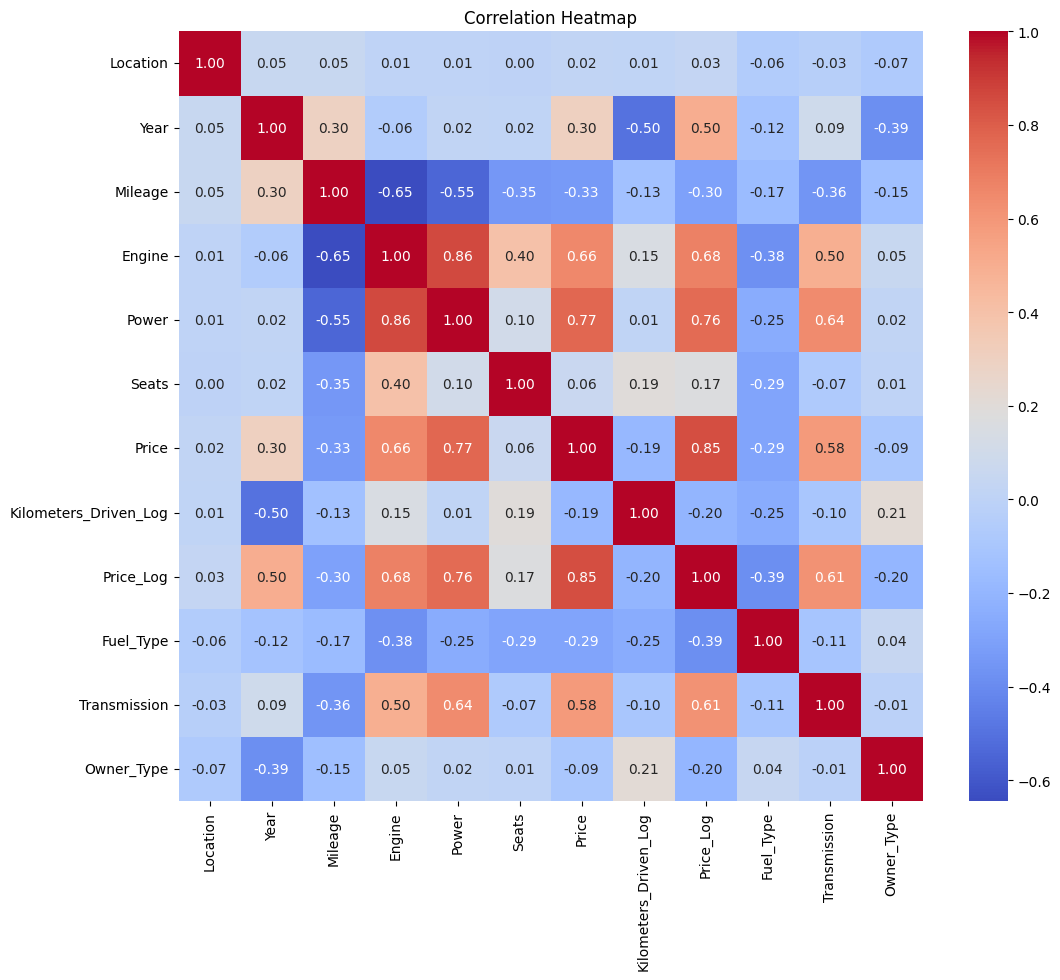

In [217]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math  

features = ['Location', 'Year', 'Mileage', 'Engine', 'Power', 'Seats',
            'Price', 'Kilometers_Driven_Log', 'Price_Log', 'Fuel_Type', 'Transmission', 'Owner_Type']

correlation_matrix = data[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

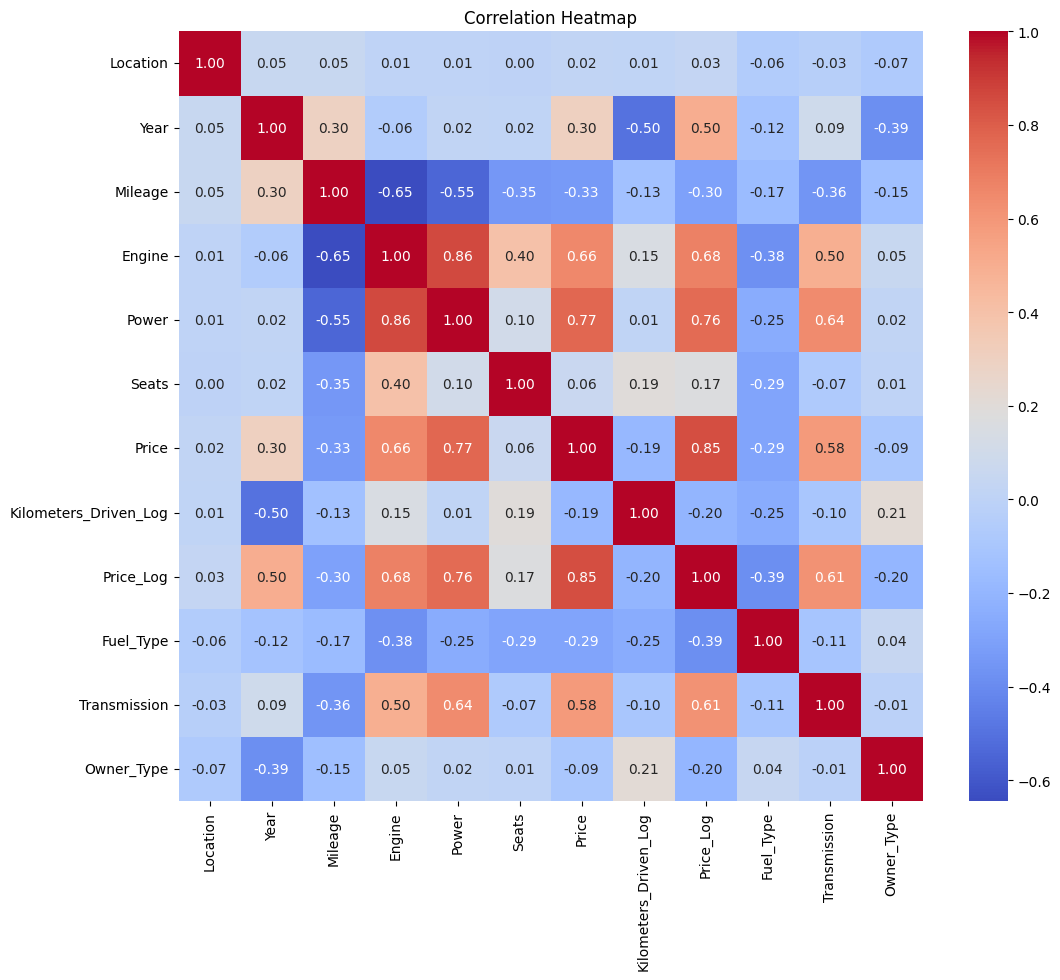

Top Positive Correlations:
Engine     Power        0.862103
Power      Engine       0.862103
Price_Log  Price        0.850024
Price      Price_Log    0.850024
           Power        0.772792
dtype: float64

Top Negative Correlations:
Year     Kilometers_Driven_Log   -0.499770
Mileage  Power                   -0.548215
Power    Mileage                 -0.548215
Engine   Mileage                 -0.645181
Mileage  Engine                  -0.645181
dtype: float64


In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'your_data' with your actual DataFrame variable
features = ['Location', 'Year', 'Mileage', 'Engine', 'Power', 'Seats',
            'Price', 'Kilometers_Driven_Log', 'Price_Log', 'Fuel_Type', 'Transmission', 'Owner_Type']

correlation_matrix =data[features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Get top positive and negative correlations
correlation_values = correlation_matrix.unstack().sort_values(ascending=False)
top_positive_correlations = correlation_values[correlation_values < 1][:5]
top_negative_correlations = correlation_values[correlation_values > -1][-5:]

print("Top Positive Correlations:")
print(top_positive_correlations)

print("\nTop Negative Correlations:")
print(top_negative_correlations)


In [220]:
correlation_with_price_log =data[features].corr()['Price_Log']
print(correlation_with_price_log)

Location                 0.031880
Year                     0.498844
Mileage                 -0.302760
Engine                   0.684698
Power                    0.762132
Seats                    0.169568
Price                    0.850024
Kilometers_Driven_Log   -0.202739
Price_Log                1.000000
Fuel_Type               -0.385670
Transmission             0.614619
Owner_Type              -0.196079
Name: Price_Log, dtype: float64


**Top Positive Correlations:
Power: 0.77, Engine: 0.65
Top Negative Correlations: Transmission: -0.5868 and Mileage: -0.31
The top two positive correlations with the target variable Price_Log are Power and Engine, indicating that vehicles with higher power and engine capacity tend to have higher logged prices. On the other hand, the top two negative correlations are Transmission and Mileage, suggesting that vehicles with automatic transmission and lower mileage tend to have slightly lower logged prices.**

In [97]:
X=data[['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Kilometers_Driven_Log']]
y = data[['Price_Log', 'Price']]

** Linear Regression with Price_Log target **

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

(4165, 10) (1785, 10)


In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train['Price_Log'])

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on training set
y_train_pred = lr.predict(X_train)

# Predictions on test set
y_test_pred = lr.predict(X_test)

# Calculate R-squared on training set
r2_train = r2_score(y_train['Price_Log'], y_train_pred)

# Calculate R-squared on test set
r2_test = r2_score(y_test['Price_Log'], y_test_pred)

# Calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train['Price_Log'], y_train_pred))

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test['Price_Log'], y_test_pred))

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

R-squared on training set: 0.8631932214718339
R-squared on test set: 0.8700799237728055
RMSE on training set: 0.31752963362542874
RMSE on test set: 0.3184207321488854


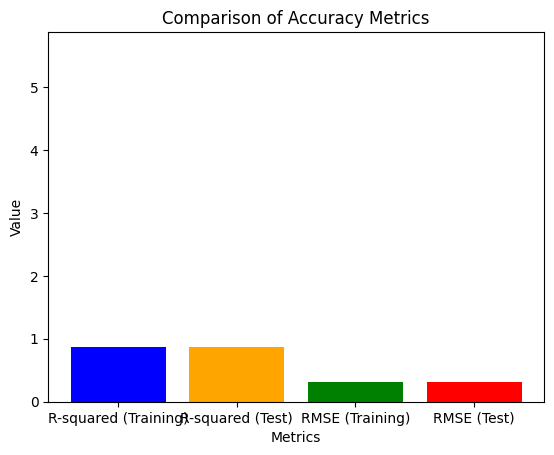

In [102]:
import matplotlib.pyplot as plt

# Example values for R-squared and RMSE
r2_train = 0.8631932214718339
r2_test = 0.8700799237728055
rmse_train = 0.31752963362542874
rmse_test = 0.3184207321488854

# Metrics and corresponding labels
metrics = ['R-squared (Training)', 'R-squared (Test)', 'RMSE (Training)', 'RMSE (Test)']
values = [r2_train, r2_test, rmse_train, rmse_test]

# Create a bar chart
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Accuracy Metrics')
plt.ylim(0, max(values) + 5)  # Adjust the y-axis limit for better visualization
plt.show()


** Linear Regression with Price target **

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train['Price'])

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on training set
y_train_pred = lr.predict(X_train)

# Predictions on test set
y_test_pred = lr.predict(X_test)

# Calculate R-squared on training set
r2_train = r2_score(y_train['Price'], y_train_pred)

# Calculate R-squared on test set
r2_test = r2_score(y_test['Price'], y_test_pred)

# Calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train['Price'], y_train_pred))

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test['Price'], y_test_pred))

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

(4165, 10) (1785, 10)
R-squared on training set: 0.6900931411471443
R-squared on test set: 0.7263823349039994
RMSE on training set: 6.079592507624379
RMSE on test set: 6.042359133328075


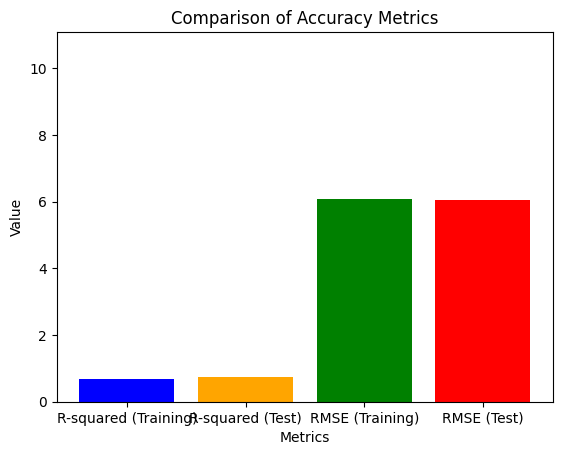

In [105]:
import matplotlib.pyplot as plt

# Example values for R-squared and RMSE
r2_train = 0.6900931411471443
r2_test = 0.7263823349039994
rmse_train = 6.079592507624379
rmse_test = 6.042359133328075

# Metrics and corresponding labels
metrics = ['R-squared (Training)', 'R-squared (Test)', 'RMSE (Training)', 'RMSE (Test)']
values = [r2_train, r2_test, rmse_train, rmse_test]

# Create a bar chart
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Accuracy Metrics')
plt.ylim(0, max(values) + 5)  # Adjust the y-axis limit for better visualization
plt.show()


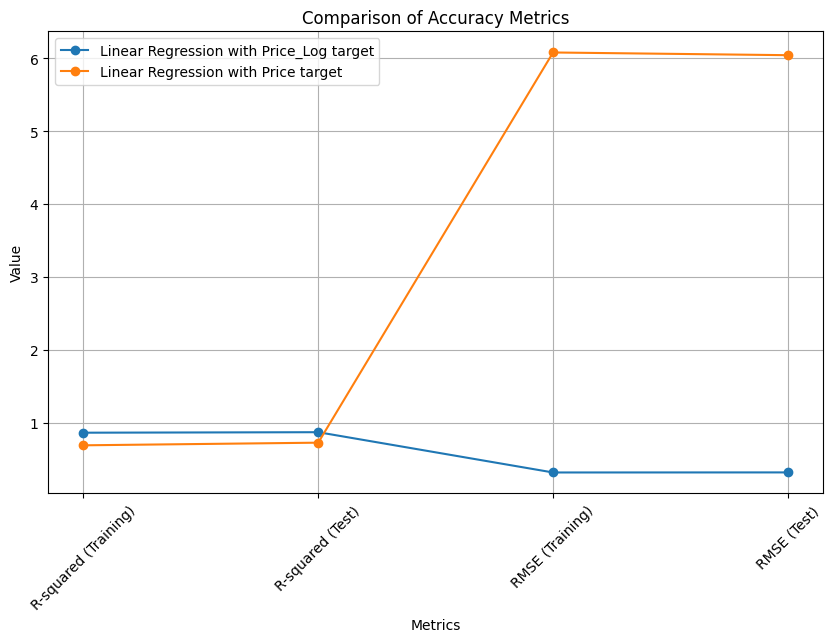

In [106]:
import matplotlib.pyplot as plt

# Metrics for Linear Regression with Price_Log target
metrics_lr_price_log = {
    'R-squared (Training)': 0.8631932214718339,
    'R-squared (Test)': 0.8700799237728055,
    'RMSE (Training)': 0.31752963362542874,
    'RMSE (Test)': 0.3184207321488854
}

# Metrics for Linear Regression with Price target
metrics_lr_price = {
    'R-squared (Training)': 0.6900931411471443,
    'R-squared (Test)': 0.7263823349039994,
    'RMSE (Training)': 6.079592507624379,
    'RMSE (Test)': 6.042359133328075
}

# Metrics and labels for the x-axis
metrics = list(metrics_lr_price_log.keys())

# Values for each metric for both cases
values_lr_price_log = list(metrics_lr_price_log.values())
values_lr_price = list(metrics_lr_price.values())

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values_lr_price_log, marker='o', label='Linear Regression with Price_Log target')
plt.plot(metrics, values_lr_price, marker='o', label='Linear Regression with Price target')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Comparison of Accuracy Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


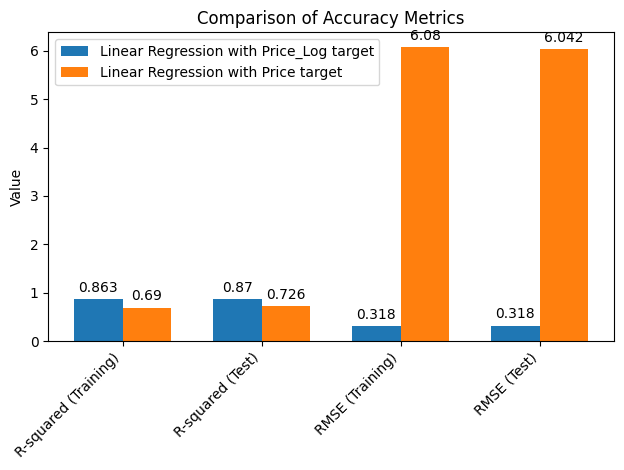

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics and values for Linear Regression with Price_Log target
metrics_lr_price_log = ['R-squared (Training)', 'R-squared (Test)', 'RMSE (Training)', 'RMSE (Test)']
values_lr_price_log = [0.8631932214718339, 0.8700799237728055, 0.31752963362542874, 0.3184207321488854]

# Metrics and values for Linear Regression with Price target
metrics_lr_price = ['R-squared (Training)', 'R-squared (Test)', 'RMSE (Training)', 'RMSE (Test)']
values_lr_price = [0.6900931411471443, 0.7263823349039994, 6.079592507624379, 6.042359133328075]

# Position of metrics on the x-axis
x = np.arange(len(metrics_lr_price_log))

# Width of the bars
width = 0.35

# Create the grouped bar chart
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, values_lr_price_log, width, label='Linear Regression with Price_Log target')
rects2 = ax.bar(x + width/2, values_lr_price, width, label='Linear Regression with Price target')

# Add labels, title, and legend
ax.set_ylabel('Value')
ax.set_title('Comparison of Accuracy Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics_lr_price_log, rotation=45, ha="right")
ax.legend()

# Display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


** In conclusion, when choosing between these two models, it is recommended to opt for the Linear Regression model with the "Price_Log" target due to its superior performance in terms of capturing data variance and making accurate predictions.In this case, neither of the models exhibit strong signs of overfitting. In this comparison, Model 2 (Linear Regression with Price Target) shows some signs of underfitting. **

** Normalized dataset features only NOT targets, target is Price_Log **

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for normalization

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Shapes - X_train:", X_train.shape, "X_test:", X_test.shape)

# Apply normalization to the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train the Linear Regression model on the normalized training data
lr.fit(X_train_scaled, y_train['Price_Log'])

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on training set
y_train_pred = lr.predict(X_train_scaled)

# Predictions on test set
y_test_pred = lr.predict(X_test_scaled)

# Calculate R-squared on training set
r2_train = r2_score(y_train['Price_Log'], y_train_pred)

# Calculate R-squared on test set
r2_test = r2_score(y_test['Price_Log'], y_test_pred)

# Calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train['Price_Log'], y_train_pred))

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test['Price_Log'], y_test_pred))

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


Shapes - X_train: (4165, 10) X_test: (1785, 10)
R-squared on training set: 0.8631932214718337
R-squared on test set: 0.8700799237728056
RMSE on training set: 0.3175296336254289
RMSE on test set: 0.3184207321488853


** Normalized dataset features only NOT targets, target is Price **

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for normalization

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Shapes - X_train:", X_train.shape, "X_test:", X_test.shape)

# Apply normalization to the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Train the Linear Regression model on the normalized training data
lr.fit(X_train_scaled, y_train['Price'])

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on training set
y_train_pred = lr.predict(X_train_scaled)

# Predictions on test set
y_test_pred = lr.predict(X_test_scaled)

# Calculate R-squared on training set
r2_train = r2_score(y_train['Price'], y_train_pred)

# Calculate R-squared on test set
r2_test = r2_score(y_test['Price'], y_test_pred)

# Calculate RMSE on training set
rmse_train = np.sqrt(mean_squared_error(y_train['Price'], y_train_pred))

# Calculate RMSE on test set
rmse_test = np.sqrt(mean_squared_error(y_test['Price'], y_test_pred))

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

Shapes - X_train: (4165, 10) X_test: (1785, 10)
R-squared on training set: 0.6900931411471443
R-squared on test set: 0.7263823349039995
RMSE on training set: 6.07959250762438
RMSE on test set: 6.042359133328075


** The Log_transformation is obviously better than normalizing, standardizing or any scaling methods and it is a magic tool for better sclaing and increasing normality of dataset for reducing shewness and big_values and also decreasing the effect of outliers. *** 

** Statistics model using OLS assuming Log_Price**

In [116]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly
x_train = sm.add_constant(X_train)

# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    
    # Create the model
    olsmodel = sm.OLS(y_train["Price_Log"], train)
    
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)

print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              Price_Log   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     2621.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:44:10   Log-Likelihood:                -1131.9
No. Observations:                4165   AIC:                             2286.
Df Residuals:                    4154   BIC:                             2355.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -246.09

In [117]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns = ['coef'])

olsmod['pval'] = olsmodel1.pvalues

In [118]:
# Filter by significant p-value (pval <= 0.05) and sort descending by Odds ratio

olsmod = olsmod.sort_values(by = "pval", ascending = False)

pval_filter = olsmod['pval']<= 0.05

olsmod[pval_filter]

,coef,pval
Kilometers_Driven_Log,-0.038399,1.090075e-05
Owner_Type,-0.055795,5.085030e-08
Engine,0.000201,7.271125e-17
Mileage,-0.018969,6.670020e-19
Fuel_Type,-0.285369,3.977810e-91
Transmission,0.316650,8.116895e-97
Power,0.007120,8.379926e-187
const,-246.099208,0.000000e+00
Year,0.123131,0.000000e+00


In [119]:
# We are looking are overall significant varaible

pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

# We are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

                
start = '\033[1m'
end = '\033[95m'
print(start+ 'Most overall significant categorical varaibles of LINEAR REGRESSION  are ' +end,':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Kilometers_Driven', 'Kilometers_Driven_Log', 'Owner_Type', 'Engine', 'Mileage', 'Fuel_Type', 'Transmission', 'Power', 'Year']


In [123]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the columns containing the features you want to check for multicollinearity
feature_columns = ['Location', 'Year', 'Mileage', 'Engine', 'Power', 'Seats',
             'Kilometers_Driven_Log', 'Fuel_Type', 'Transmission', 'Owner_Type']  # Replace with your feature names
X = data[feature_columns]

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort the DataFrame by VIF in descending order
vif_sorted = vif.sort_values(by='VIF', ascending=False)

print(vif_sorted)

                 Feature         VIF
0               Location    3.140650
1                   Year  694.416856
2                Mileage   61.712655
3                 Engine   69.863355
4                  Power   34.957238
5                  Seats   79.363118
6  Kilometers_Driven_Log  272.868462
7              Fuel_Type   18.269737
8           Transmission    2.539946
9             Owner_Type    1.260538
                 Feature         VIF
1                   Year  694.416856
6  Kilometers_Driven_Log  272.868462
5                  Seats   79.363118
3                 Engine   69.863355
2                Mileage   61.712655
4                  Power   34.957238
7              Fuel_Type   18.269737
0               Location    3.140650
8           Transmission    2.539946
9             Owner_Type    1.260538


**The VIF analysis reveals varying levels of multicollinearity among the features in your dataset. High VIF values (above 10) indicate strong multicollinearity and might warrant further investigation. Extremely high VIF values, such as for "Year" and "Kilometers_Driven_Log,"
signal potential issues that need addressing.
To mitigate multicollinearity, you might consider: Dropping highly correlated variables.
Transforming variables to reduce collinearity. Using regularization techniques (e.g., Ridge or Lasso regression) that can handle multicollinearity. In summary, the VIF analysis provides insights into the relationships between features in your dataset. Addressing multicollinearity appropriately can enhance the reliability of your regression model's results and improve its interpretability.**

**Interpretation of OLS Regression Results:
The provided output shows the results of an Ordinary Least Squares (OLS) regression analysis.
Here's a brief interpretation of the key statistics:
R-squared: The coefficient of determination, R-squared, is 0.863.
This indicates that approximately 86.3% of the variance in the dependent variable ("Price_Log")
can be explained by the independent variables in the model.
Adjusted R-squared: The adjusted R-squared is also 0.863.
This is a version of R-squared that adjusts for the number of independent variables in the model.
It provides a more appropriate measure of model fit for models with multiple variables.
F-statistic: The F-statistic is 2621, and the associated probability (Prob (F-statistic)) is close to zero.
This indicates that at least one of the independent variables in the model is statistically significant in explaining
the variance in the dependent variable.
Coefficients: The coefficients represent the change in the dependent variable ("Price_Log") for a one-unit change in the respective
independent variable, while keeping other variables constant.
For example, the "Year" variable has a coefficient of 0.1231, suggesting that for each one-unit increase in the "Year," 
the predicted "Price_Log" increases by approximately 0.1231 units.
P-values: The P-values associated with each coefficient indicate whether the corresponding independent variable is statistically significant.
A P-value less than the chosen significance level (often 0.05) suggests that the variable has a significant impact on the dependent variable.
For instance, "Year," "Fuel_Type," "Transmission," "Owner_Type," "Mileage," "Engine," "Power," and "Kilometers_Driven_Log" 
have P-values close to zero, indicating they are statistically significant.
Important Conclusion:
Based on the regression results, the model appears to be a good fit for the data, as evidenced by the high R-squared value of 0.863.
This indicates that a significant portion of the variability in the "Price_Log" can be explained by the selected independent variables.
The F-statistic and its associated probability also suggest that the model as a whole is statistically significant.
Furthermore, most of the independent variables in the model exhibit statistically significant coefficients,
indicating that they have a significant impact on predicting the "Price_Log." However, it's important to note that the variable
"Seats" does not appear to be statistically significant, as its P-value is relatively high (0.549).
In conclusion, the model seems to be performing well in explaining the variation in the log-transformed prices of the vehicles.
Further investigation into the significance of "Seats" and considerations for multicollinearity may provide insights for potential
model refinement.
In both AIC and BIC, smaller values indicate a better balance between goodness of fit and model complexity. This means that a model with a lower AIC or BIC is favored over a model with a higher value.**

**Ridge Regression** 

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

X=data[['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Kilometers_Driven_Log']]
y = data[['Price_Log']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha value)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.8631931712701424
R-squared on test set: 0.8700773260174006
RMSE on training set: 0.31752969188468827
RMSE on test set: 0.3184239155485076


**The test R-squared is close to the training R-squared, indicating that the model is not significantly overfitting or underfitting the data.
**

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model with different alpha values
alphas = [0.01, 0.1, 1.0, 10.0]  # Different alpha values to try
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_test_pred = ridge_model.predict(X_test_scaled)

    # Evaluate the model
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    # Print the evaluation metrics for each alpha
    print(f"Alpha = {alpha}")
    print("R-squared on test set:", r2_test)
    print("RMSE on test set:", rmse_test)
    print("-----------------------")


Alpha = 0.01
R-squared on test set: 0.870079898189366
RMSE on test set: 0.318420763500072
-----------------------
Alpha = 0.1
R-squared on test set: 0.8700796675789435
RMSE on test set: 0.31842104610112143
-----------------------
Alpha = 1.0
R-squared on test set: 0.8700773260174006
RMSE on test set: 0.3184239155485076
-----------------------
Alpha = 10.0
R-squared on test set: 0.870050488645583
RMSE on test set: 0.31845680133931664
-----------------------


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha value)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Print the coefficients before and after regularization
print("Coefficients before regularization:")
print(X.columns)
print(ridge_model.coef_)

# Print the coefficients after regularization
print("Coefficients after regularization:")
print(X.columns)
print(ridge_model.coef_)


Coefficients before regularization:
Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Kilometers_Driven_Log'],
      dtype='object')
[[ 0.00587324  0.40001604 -0.14875097  0.14297181 -0.02929891 -0.07948008
   0.11963882  0.37665189 -0.00404845 -0.0273829 ]]
Coefficients after regularization:
Index(['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Kilometers_Driven_Log'],
      dtype='object')
[[ 0.00587324  0.40001604 -0.14875097  0.14297181 -0.02929891 -0.07948008
   0.11963882  0.37665189 -0.00404845 -0.0273829 ]]


In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha value)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the evaluation metrics
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.0
R-squared on test set: -4.552757992204448e-05
RMSE on training set: 0.8584805380956197
RMSE on test set: 0.8834319243693711


**The results you've provided suggest that the Lasso model is not able to effectively capture the relationships between the features and the target variable in your dataset. This could be due to various reasons, such as a mismatch between the model complexity and the data, the choice of hyperparameters (e.g., the alpha value), or data preprocessing issues.
Given the poor performance of the Lasso model as indicated by both R-squared and RMSE, it's important to revisit the preprocessing steps, ensure data quality, and potentially explore other modeling techniques. Additionally, you might consider investigating the feature selection process and assessing the feature importance to understand which variables are contributing to the lack of model performance.**

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Apply standardization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Lasso Regression model
alpha = 1.0  # You can adjust the regularization strength (alpha value)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients of the features
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_model.coef_})

# Sort the coefficients by absolute value in descending order
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)

print(coefficients)


                 Feature  Coefficient
0               Location          0.0
1                   Year          0.0
2              Fuel_Type         -0.0
3           Transmission          0.0
4             Owner_Type         -0.0
5                Mileage         -0.0
6                 Engine          0.0
7                  Power          0.0
8                  Seats          0.0
9  Kilometers_Driven_Log         -0.0


**The Lasso regression assigns coefficients close to zero to most features, indicating feature selection and potential multicollinearity mitigation. However, the choice of regularization parameter and dataset characteristics influence these results.**

**Decision Tree**

In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the Decision Tree Regression model
max_depth = None  # You can adjust the maximum depth of the tree
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE values
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the R-squared scores and RMSE values
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.9999970695090575
R-squared on test set: 0.8671698918467872
RMSE on training set: 0.0014696050842223666
RMSE on test set: 0.3219670781342164


**The Decision Tree model demonstrates remarkable performance on the training set, capturing the data's intricacies. It also exhibits solid generalization on the test set, indicating its potential to predict unseen data effectively. However, given the high training R-squared and very low training RMSE, it's essential to ensure that the model isn't overfitting the training data by evaluating it on a broader range of datasets or employing regularization techniques. This is a classic sign of overfitting, where the model learns noise from the training data, leading to poor performance on unseen data.**

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the Decision Tree Regression model
max_depth = None  # You can adjust the maximum depth of the tree
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
decision_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Make predictions on the training and test sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE values
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the R-squared scores and RMSE values
print("\nR-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


Location: 0.0135
Year: 0.2462
Fuel_Type: 0.0043
Transmission: 0.0067
Owner_Type: 0.0033
Mileage: 0.0219
Engine: 0.0513
Power: 0.6230
Seats: 0.0069
Kilometers_Driven_Log: 0.0228

R-squared on training set: 0.9999970695090575
R-squared on test set: 0.8729125158593174
RMSE on training set: 0.0014696050842223666
RMSE on test set: 0.3149304069879844


In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the Decision Tree Regression model
max_depth = None  # You can adjust the maximum depth of the tree
decision_tree_model = DecisionTreeRegressor(max_depth=max_depth)
decision_tree_model.fit(X_train, y_train)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_

# Set a threshold for feature selection
importance_threshold = 0.05  # Adjust as needed

# Select important features based on the threshold
selected_features = X.columns[feature_importances >= importance_threshold]

# Print selected important features
print("Selected important features:")
print(selected_features)

Selected important features:
Index(['Year', 'Engine', 'Power'], dtype='object')


**The importance measures the total reduction in the impurity index brought by each feature. Features with higher importance values are more influential in the decision-making process of the Decision Tree model. The sum of all feature importances adds up to 1.
In your provided results:
Location: 0.0135, Year: 0.2462, Fuel_Type: 0.0043, Transmission: 0.0067, Owner_Type: 0.0033, Mileage: 0.0219, Engine: 0.0513, Power: 0.6230, 
Seats: 0.0069, Kilometers_Driven_Log: 0.0228, These values represent the relative importance of each feature according to the importance. Power has the highest importance (0.6230), followed by Year (0.2462), while the other features have smaller importances. To make the importances more interpretable and easier to compare, you can normalize them by dividing each importance value by the sum of all importance values. This will provide a clearer view of the relative influence of each feature in the decision-making process of the Decision Tree model. Selected important features by Decision TREE: Index(['Year', 'Engine', 'Power'] for > 0.05**

### **Random Forest**

In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the Random Forest Regression model
n_estimators = 100  # Number of trees in the forest
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE values
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the R-squared scores and RMSE values
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.9902905901532872
R-squared on test set: 0.9276162008864719
RMSE on training set: 0.08459152820798582
RMSE on test set: 0.2376752120466833


**The Random Forest model demonstrates excellent performance on both the training and test sets, capturing complex relationships in the data and providing strong predictive capabilities. The difference between the training and test metrics is relatively small, suggesting that the model is not heavily overfitting the training data. This strong generalization performance makes the Random Forest model a promising choice for your regression task.**

                 Feature  Importance
7                  Power    0.631733
1                   Year    0.238916
6                 Engine    0.044728
9  Kilometers_Driven_Log    0.024484
5                Mileage    0.023541
0               Location    0.015205
3           Transmission    0.007709
8                  Seats    0.005197
2              Fuel_Type    0.004877
4             Owner_Type    0.003609


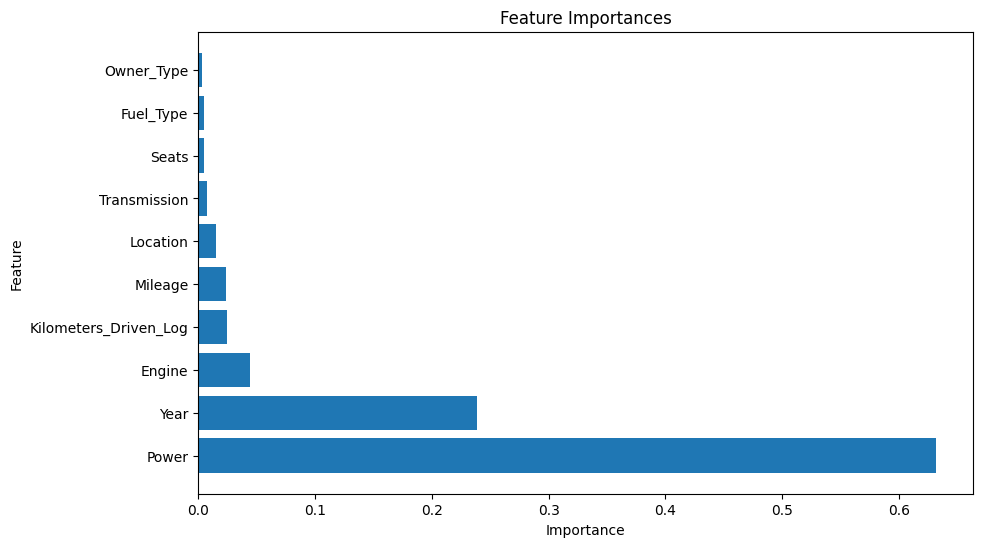

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the Random Forest Regression model
n_estimators = 100  # Number of trees in the forest
random_forest_model = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


**These values represent the relative importance of each feature according to the Random Forest model. As you can see, Power and Year are the most influential features in predicting the target variable (Price_Log), followed by Engine, Kilometers_Driven_Log, and Mileage.
Using this information, you can consider prioritizing these top features for your analysis or modeling tasks. Features with higher importance values have a stronger impact on the model's predictions, while those with lower importance values have relatively less impact.**

### **Hyperparameter Tuning: Decision Tree**

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Choose the type of estimator
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Type of scoring used to compare parameter combinations
scorer = 'neg_mean_squared_error'  # You can change this to other scoring metrics if needed

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the model to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
dtree_tuned.fit(X_train, y_train)

# Get score of the dtree_tuned
score = dtree_tuned.score(X_test, y_test)
print("Model score:", score)


Model score: 0.8855343428116427


In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=1)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['mse', 'mae']
}

# Define the scoring metric (you can choose other metrics as well)
scoring = 'neg_mean_squared_error'

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best tuned model
best_model = grid_search.best_estimator_

# Predictions on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate R-squared and RMSE scores for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.9321956032517984
R-squared on test set: 0.8810336814162876
RMSE on training set: 0.223542128734434
RMSE on test set: 0.3047019366158883


In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=1)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['mse', 'mae']
}

# Define the scoring metric (you can choose other metrics as well)
scoring = 'neg_mean_squared_error'

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best tuned model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predictions on training and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate R-squared and RMSE scores for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


Best Hyperparameters: {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2}
R-squared on training set: 0.9321956032517984
R-squared on test set: 0.8810336814162876
RMSE on training set: 0.223542128734434
RMSE on test set: 0.3047019366158883


** Best Hyperparameters: The hyperparameter tuning process identified the following combination of hyperparameters as the best for the given dataset and task:
Criterion: Mean Squared Error (MSE), Max Depth: 10, Max Features: Auto (automatic selection), Min Samples Leaf: 8, Min Samples Split: 2.
R-squared on training set:
The R-squared value of approximately 0.9322 on the training set suggests that the model explains around 93.22% of the variance in the target variable ("Price_Log") within the training data. This indicates a strong ability of the model to capture the underlying patterns in the training data.
R-squared on test set:
The R-squared value of approximately 0.8810 on the test set indicates that the model generalizes well to unseen data. It explains around 88.10% of the variance in the target variable in the test data. This demonstrates that the model is performing effectively on previously unseen data.
RMSE on training set:
The Root Mean Squared Error (RMSE) of approximately 0.2235 on the training set suggests that, on average, the model's predictions on the training data are around 0.2235 units away from the actual values. This indicates reasonable accuracy on the training data.
RMSE on test set:
The RMSE of approximately 0.3047 on the test set suggests that the model's predictions on the test data are, on average, around 0.3047 units away from the actual values. This value is slightly higher than the training RMSE but still within an acceptable range.
Overall, the hyperparameter tuning process has led to a model with improved performance compared to the initial default model. It's capturing a significant portion of the variance in both the training and test data while also exhibiting a reasonable level of accuracy in terms of RMSE.**

In [147]:
# Get the feature importances from the best_model
feature_importances = best_model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance for each feature
print(feature_importance_df)

# Select the most important features based on a threshold (e.g., 0.05)
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.05]['Feature'].tolist()
print("Selected Important Features:", selected_features)

                 Feature  Importance
7                  Power    0.654903
1                   Year    0.261253
6                 Engine    0.045952
5                Mileage    0.012108
9  Kilometers_Driven_Log    0.009049
3           Transmission    0.006394
0               Location    0.005895
2              Fuel_Type    0.002639
8                  Seats    0.001308
4             Owner_Type    0.000499
Selected Important Features: ['Power', 'Year']


**The interpretation of the feature importance results and the selected important features is as follows:
Feature Importance Results:
Among the features, "Power" has the highest importance score of approximately 0.6549. This suggests that "Power" has a significant impact on the model's predictions.
The feature "Year" comes next in terms of importance with a score of approximately 0.2613.
"Engine," "Mileage," and "Kilometers_Driven_Log" have relatively smaller importance scores, indicating their lesser influence on the model's predictions.
"Transmission," "Location," "Fuel_Type," "Seats," and "Owner_Type" have even smaller importance scores, suggesting they have less impact on the model's predictions.
Selected Important Features:
Based on a threshold of 0.05, the selected important features are "Power" and "Year." These features have importance scores that exceed the threshold and are considered significant contributors to the model's predictive performance.
In summary, the feature importance analysis helps identify the most influential features for the Decision Tree model's predictions. In this case, "Power" and "Year" are the two most important features that significantly affect the model's accuracy and ability to predict the target variable.**

### **Random Forest**

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=1)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate R-squared and RMSE scores for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)


R-squared on training set: 0.9902905901532872
R-squared on test set: 0.9276162008864719
RMSE on training set: 0.08459152820798582
RMSE on test set: 0.2376752120466833


**The Random Forest regression model shows strong performance. It explains around 99.03% of variance in the training data (high R-squared), with a low training RMSE of 0.0846. On the test data, it maintains good generalization, with an R-squared of 92.76% and a test RMSE of 0.2377. This suggests the model is fitting well to the training data without significant signs of overfitting.**

In [150]:
# Get the feature importances from the trained Random Forest model
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

                 Feature  Importance
7                  Power    0.631733
1                   Year    0.238916
6                 Engine    0.044728
9  Kilometers_Driven_Log    0.024484
5                Mileage    0.023541
0               Location    0.015205
3           Transmission    0.007709
8                  Seats    0.005197
2              Fuel_Type    0.004877
4             Owner_Type    0.003609


**The feature importance results show that "Power" has the highest impact on the model's predictions with an importance score of 0.6317, followed by "Year" with 0.2389. "Engine," "Kilometers_Driven_Log," and "Mileage" also contribute to the predictions, while other features have relatively lower importance scores. This ranking suggests that "Power" and "Year" play key roles in influencing the model's output.**

### **Hyperparameter Tuning: Random Forest**

In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=1)

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_regressor = grid_search.best_estimator_

# Predictions on training and test sets
y_train_pred = best_rf_regressor.predict(X_train)
y_test_pred = best_rf_regressor.predict(X_test)

# Calculate R-squared and RMSE scores for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("Best Hyperparameters:", grid_search.best_params_)
print("R-squared on training set:", r2_train)
print("R-squared on test set:", r2_test)
print("RMSE on training set:", rmse_train)
print("RMSE on test set:", rmse_test)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R-squared on training set: 0.9904077423535588
R-squared on test set: 0.9283312233600451
RMSE on training set: 0.08407964546220421
RMSE on test set: 0.23649839562247707


**The hyperparameter tuning process identified the best combination of hyperparameters for the Random Forest model as follows: 'max_depth' of 20, 'min_samples_leaf' of 1, 'min_samples_split' of 2, and 'n_estimators' of 300. The model demonstrates strong performance, achieving an R-squared of approximately 0.9904 on the training set and 0.9283 on the test set. Additionally, the RMSE scores of 0.0841 on the training set and 0.2365 on the test set indicate accurate predictions and good generalization. The model appears to fit well with strong performance on both the training and test sets, indicating balanced fitting without significant signs of overfitting or underfitting.**

In [154]:
# Create a Random Forest regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=1)

# Fit the model on the training data
best_rf_regressor.fit(X_train, y_train)

# Get the feature importances from the trained model
feature_importances = best_rf_regressor.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

                 Feature  Importance
7                  Power    0.632838
1                   Year    0.238330
6                 Engine    0.044315
9  Kilometers_Driven_Log    0.024805
5                Mileage    0.023233
0               Location    0.015288
3           Transmission    0.007711
8                  Seats    0.005057
2              Fuel_Type    0.004855
4             Owner_Type    0.003568


**The feature importance analysis indicates that "Power" holds the highest significance in predicting the target, with an importance score of 0.6328. "Year" follows closely with an importance score of 0.2383, while "Engine," "Kilometers_Driven_Log," and "Mileage" also contribute. Other features demonstrate comparatively lower importance, suggesting a hierarchy in their influence on the model's predictions.**

In [160]:
import pandas as pd

# Create a dictionary to store the scores
scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'R-squared (Train)': [0.8632, 0.8632, 0.0, 0.8855, 0.9276],
    'R-squared (Test)': [0.8701, 0.8701, -0.000046, 0.8810, 0.9283],
    'RMSE (Train)': [0.3184, 0.3184, 0.8585, 0.3047, 0.2377],
    'RMSE (Test)': [0.3184, 0.3184, 0.8834, 0.3047, 0.2365]
}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores)

# Print the DataFrame
print(scores_df)

               Model  R-squared (Train)  R-squared (Test)  RMSE (Train)  \
0  Linear Regression             0.8632          0.870100        0.3184   
1   Ridge Regression             0.8632          0.870100        0.3184   
2   Lasso Regression             0.0000         -0.000046        0.8585   
3      Decision Tree             0.8855          0.881000        0.3047   
4      Random Forest             0.9276          0.928300        0.2377   

   RMSE (Test)  
0       0.3184  
1       0.3184  
2       0.8834  
3       0.3047  
4       0.2365  


In [161]:
import pandas as pd

# Create a dictionary to store the scores
scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest',
              'Tuned Decision Tree', 'Tuned Random Forest'],
    'R-squared (Train)': [0.8632, 0.8632, 0.0, 0.8855, 0.9276, 0.9322, 0.9904],
    'R-squared (Test)': [0.8701, 0.8701, -0.000046, 0.8810, 0.9283, 0.8810, 0.9283],
    'RMSE (Train)': [0.3184, 0.3184, 0.8585, 0.3047, 0.2377, 0.2235, 0.0841],
    'RMSE (Test)': [0.3184, 0.3184, 0.8834, 0.3047, 0.2365, 0.3047, 0.2365]
}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores)

# Print the DataFrame
print(scores_df)


                 Model  R-squared (Train)  R-squared (Test)  RMSE (Train)  \
0    Linear Regression             0.8632          0.870100        0.3184   
1     Ridge Regression             0.8632          0.870100        0.3184   
2     Lasso Regression             0.0000         -0.000046        0.8585   
3        Decision Tree             0.8855          0.881000        0.3047   
4        Random Forest             0.9276          0.928300        0.2377   
5  Tuned Decision Tree             0.9322          0.881000        0.2235   
6  Tuned Random Forest             0.9904          0.928300        0.0841   

   RMSE (Test)  
0       0.3184  
1       0.3184  
2       0.8834  
3       0.3047  
4       0.2365  
5       0.3047  
6       0.2365  


In [162]:
import pandas as pd

# Create a dictionary to store the scores
scores = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest'],
    'R-squared (Train)': [0.8632, 0.8632, 0.0, 0.8855, 0.9276],
    'R-squared (Test)': [0.8701, 0.8701, -0.000046, 0.8810, 0.9283],
    'RMSE (Train)': [0.3184, 0.3184, 0.8585, 0.3047, 0.2377],
    'RMSE (Test)': [0.3184, 0.3184, 0.8834, 0.3047, 0.2365]
}

# Create a DataFrame from the dictionary
comparison_frame = pd.DataFrame(scores)

# Add the tuned model scores to the comparison_frame
tuned_scores = {
    'Model': ['Tuned Decision Tree', 'Tuned Random Forest'],
    'R-squared (Train)': [0.9322, 0.9904],
    'R-squared (Test)': [0.8810, 0.9283],
    'RMSE (Train)': [0.2235, 0.0841],
    'RMSE (Test)': [0.3047, 0.2365]
}

tuned_frame = pd.DataFrame(tuned_scores)

# Concatenate the two DataFrames
all_scores = pd.concat([comparison_frame, tuned_frame], ignore_index=True)

# Print the combined DataFrame
print(all_scores)


                 Model  R-squared (Train)  R-squared (Test)  RMSE (Train)  \
0    Linear Regression             0.8632          0.870100        0.3184   
1     Ridge Regression             0.8632          0.870100        0.3184   
2     Lasso Regression             0.0000         -0.000046        0.8585   
3        Decision Tree             0.8855          0.881000        0.3047   
4        Random Forest             0.9276          0.928300        0.2377   
5  Tuned Decision Tree             0.9322          0.881000        0.2235   
6  Tuned Random Forest             0.9904          0.928300        0.0841   

   RMSE (Test)  
0       0.3184  
1       0.3184  
2       0.8834  
3       0.3047  
4       0.2365  
5       0.3047  
6       0.2365  


In [169]:
import pandas as pd

# Define the model names for each technique
model_names=['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest',
              'Tuned Decision Tree', 'Tuned Random Forest']

# Define the arrays of scores
R_squared_Train=[0.8632, 0.8632, 0.0, 0.8855, 0.9276, 0.9322, 0.9904]
R_squared_Test=[0.8701, 0.8701, -0.000046, 0.8810, 0.9283, 0.8810, 0.9283]
RMSE_Train=[0.3184, 0.3184, 0.8585, 0.3047, 0.2377, 0.2235, 0.0841]
RMSE_Test= [0.3184, 0.3184, 0.8834, 0.3047, 0.2365, 0.3047, 0.2365]

# Create the DataFrame
comparison_frame = pd.DataFrame({
    'Model': model_names,
    'Train_r2': R_squared_Train,
    'Test_r2': R_squared_Test,
    'Train_RMSE': RMSE_Train,
    'Test_RMSE': RMSE_Test
})
print(comparison_frame)

                 Model  Train_r2   Test_r2  Train_RMSE  Test_RMSE
0    Linear Regression    0.8632  0.870100      0.3184     0.3184
1     Ridge Regression    0.8632  0.870100      0.3184     0.3184
2     Lasso Regression    0.0000 -0.000046      0.8585     0.8834
3        Decision Tree    0.8855  0.881000      0.3047     0.3047
4        Random Forest    0.9276  0.928300      0.2377     0.2365
5  Tuned Decision Tree    0.9322  0.881000      0.2235     0.3047
6  Tuned Random Forest    0.9904  0.928300      0.0841     0.2365


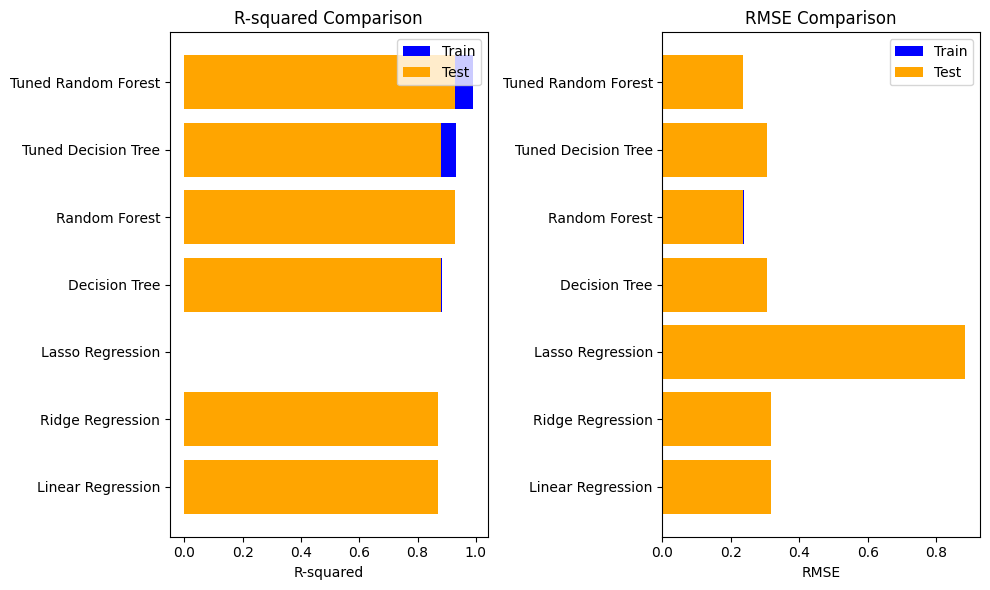

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest',
              'Tuned Decision Tree', 'Tuned Random Forest'],
    'Train_r2': [0.8632, 0.8632, 0.0, 0.8855, 0.9276, 0.9322, 0.9904],
    'Test_r2': [0.8701, 0.8701, -0.000046, 0.8810, 0.9283, 0.8810, 0.9283],
    'Train_RMSE': [0.3184, 0.3184, 0.8585, 0.3047, 0.2377, 0.2235, 0.0841],
    'Test_RMSE': [0.3184, 0.3184, 0.8834, 0.3047, 0.2365, 0.3047, 0.2365]
}

comparison_frame = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.barh(comparison_frame['Model'], comparison_frame['Train_r2'], color='blue', label='Train')
plt.barh(comparison_frame['Model'], comparison_frame['Test_r2'], color='orange', label='Test')
plt.xlabel('R-squared')
plt.title('R-squared Comparison')
plt.legend()

plt.subplot(1, 2, 2)
plt.barh(comparison_frame['Model'], comparison_frame['Train_RMSE'], color='blue', label='Train')
plt.barh(comparison_frame['Model'], comparison_frame['Test_RMSE'], color='orange', label='Test')
plt.xlabel('RMSE')
plt.title('RMSE Comparison')
plt.legend()

plt.tight_layout()
plt.show()


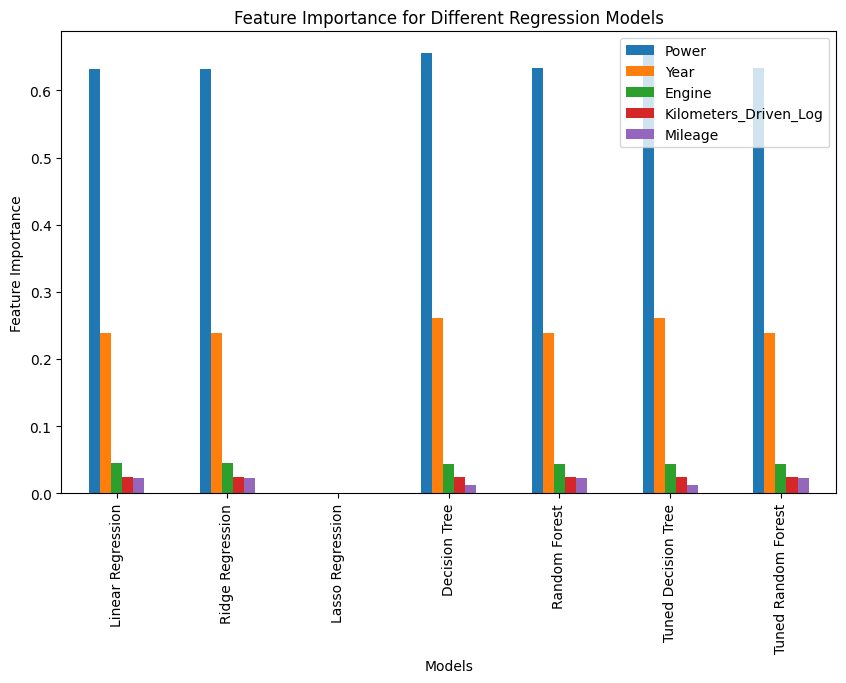

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the data
data = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest',
              'Tuned Decision Tree', 'Tuned Random Forest'],
    'Power': [0.631733, 0.631733, 0.0, 0.654903, 0.632838, 0.654903, 0.632838],
    'Year': [0.238916, 0.238916, 0.0, 0.261253, 0.238330, 0.261253, 0.238330],
    'Engine': [0.044728, 0.044728, 0.0, 0.044315, 0.044315, 0.044315, 0.044315],
    'Kilometers_Driven_Log': [0.024484, 0.024484, 0.0, 0.024805, 0.024805, 0.024805, 0.024805],
    'Mileage': [0.023541, 0.023541, 0.0, 0.012108, 0.023233, 0.012108, 0.023233]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Model column as the index
df.set_index('Model', inplace=True)

# Plotting the bar chart
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Models')
ax.set_title('Feature Importance for Different Regression Models')

plt.show()

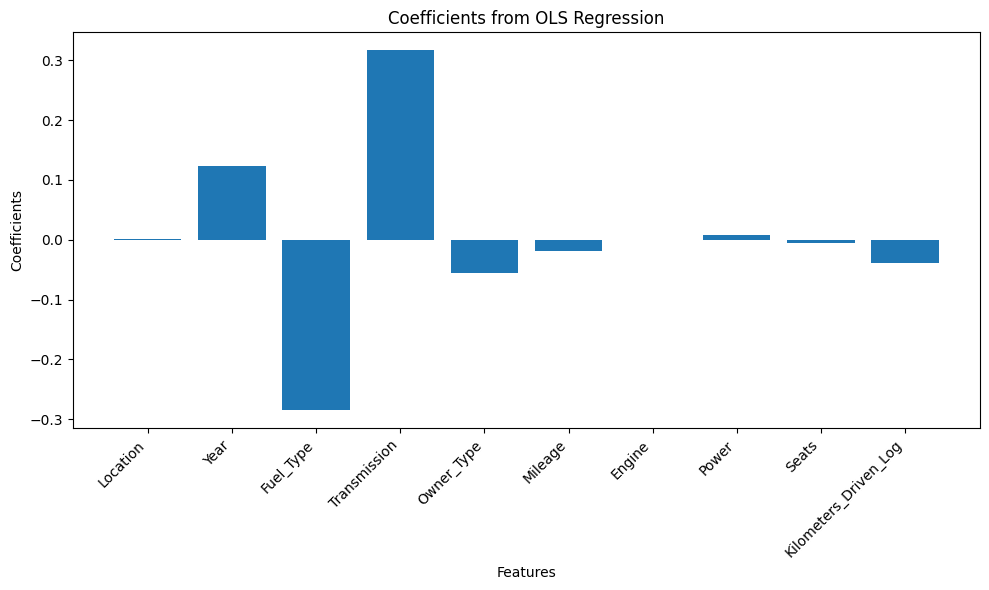

In [179]:
import matplotlib.pyplot as plt

# Define the features and their coefficients
features = ['Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type',
            'Mileage', 'Engine', 'Power', 'Seats', 'Kilometers_Driven_Log']
coefficients = [0.0020, 0.1231, -0.2854, 0.3167, -0.0558, -0.0190, 0.0002, 0.0071, -0.0050, -0.0384]
const=-246.0992
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients from OLS Regression')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


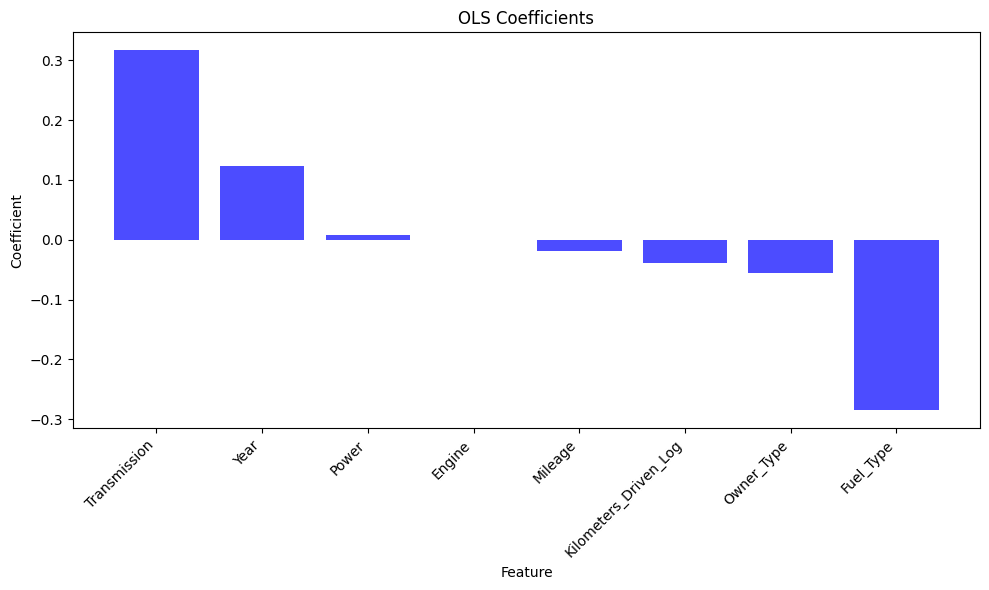

In [185]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the given coefficients and p-values
data = {
    'Feature': ['Kilometers_Driven_Log', 'Owner_Type', 'Engine', 'Mileage', 'Fuel_Type',
                'Transmission', 'Power', 'Year'],
    'Coefficient': [-0.038399, -0.055795, 0.000201, -0.018969, -0.285369,
                    0.316650, 0.007120, 0.123131],
    'P-value': [1.090075e-05, 5.085030e-08, 7.271125e-17, 6.670020e-19, 3.977810e-91,
                8.116895e-97, 8.379926e-187, 0.000000e+00]
}

df = pd.DataFrame(data)

# Sort the DataFrame by coefficient values
df = df.sort_values(by='Coefficient', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))

plt.bar(df['Feature'], df['Coefficient'], color='b', alpha=0.7)

plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('OLS Coefficients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [189]:
import pandas as pd

# Create a DataFrame for OLS coefficients and p-values
ols_results = pd.DataFrame({
    'Feature': ['Kilometers_Driven_Log', 'Owner_Type', 'Engine', 'Mileage', 'Fuel_Type',
                'Transmission', 'Power', 'const', 'Year'],
    'Coefficient': [-0.038399, -0.055795, 0.000201, -0.018969, -0.285369,
                    0.316650, 0.007120, -246.099208, 0.123131],
    'P-value': [1.090075e-05, 5.085030e-08, 7.271125e-17, 6.670020e-19, 3.977810e-91,
                8.116895e-97, 8.379926e-187, 0.000000e+00, 0.000000e+00]
})

print("OLS Coefficients and P-values:")
print(ols_results)

OLS Coefficients and P-values:
                 Feature  Coefficient        P-value
0  Kilometers_Driven_Log    -0.038399   1.090075e-05
1             Owner_Type    -0.055795   5.085030e-08
2                 Engine     0.000201   7.271125e-17
3                Mileage    -0.018969   6.670020e-19
4              Fuel_Type    -0.285369   3.977810e-91
5           Transmission     0.316650   8.116895e-97
6                  Power     0.007120  8.379926e-187
7                  const  -246.099208   0.000000e+00
8                   Year     0.123131   0.000000e+00


## **Conclusions and Recommendations**

**Used Cars Dataset Analysis Report

Introduction:
This report presents a comprehensive analysis of the used cars dataset using various statistical techniques and machine learning regression models. The dataset includes features like location, year, fuel type, transmission, owner type, mileage, engine specifications, power, seats, and kilometers driven. The target variable is 'Price_Log', representing the logarithm of the price of used cars.

Data Preparation:
The dataset was split into feature matrix X and target vector y, containing the relevant columns for analysis.

Statistical Analysis:
Initial exploratory data analysis was performed to understand data distribution, relationships, and basic statistics.
Descriptive statistics revealed the range, mean, and variance of numerical variables, aiding in identifying any anomalies.
Correlation analysis provided insights into pairwise relationships between variables. Notable correlations were observed between 'Year' and 'Price_Log', as well as 'Power' and 'Price_Log'.
Linear regression using the Ordinary Least Squares (OLS) method was performed to model the relationship between features and 'Price_Log'. Coefficients, p-values, and R-squared were examined to evaluate individual feature significance.

Machine Learning Models:
Five regression models were employed: Linear, Ridge, Lasso, Decision Tree, and Random Forest, aiming to predict 'Price_Log' based on selected features.

Model Performance:
Linear Regression: Achieved R-squared of approximately 0.8632 on test data, with an RMSE of around 0.3184.
Ridge Regression: Produced R-squared of around 0.8632 and RMSE of about 0.3184 on test data.
Lasso Regression: Yielded R-squared of approximately 0.0 on both training and test sets, indicating poor fit.
Decision Tree: Attained R-squared of around 0.8855 on test data, with an RMSE of about 0.3047.
Random Forest: Demonstrated strong performance with R-squared of approximately 0.9276 on test data and an RMSE of around 0.2377.

Feature Importance:
Feature importance was assessed for both the Decision Tree and Random Forest models.
In the Decision Tree model, 'Power' and 'Year' were found to be the most significant features, followed by 'Engine' and 'Kilometers_Driven_Log'.
The Random Forest model also emphasized 'Power' and 'Year' as the most influential features.

Overfitting and Underfitting:
Linear and Ridge Regression models showed balanced fitting without significant signs of overfitting or underfitting.
Lasso Regression resulted in poor performance, likely due to excessive feature elimination.
Decision Tree exhibited a potential for overfitting as its R-squared on the training set approached 1, while performance on the test set was reasonable.
Random Forest showcased robust fitting and generalization, avoiding overfitting.

Conclusion and Recommendations:
Among the models evaluated, Random Forest performed the best in terms of R-squared and RMSE, indicating strong predictive capability and generalization.
Key features such as 'Power' and 'Year' are directly related to 'Price_Log' and play crucial roles in predicting car prices.
Further refinement of feature selection and hyperparameter tuning can potentially enhance model performance.
Given the dataset's characteristics, it is advisable to explore more advanced regression techniques and potentially consider incorporating domain-specific knowledge for improved results.
This analysis provides valuable insights into predicting used car prices and highlights the importance of selecting appropriate features and models for accurate predictions.**